<a href="https://colab.research.google.com/github/Mayukhgits/Displaying-a-Well-Plot/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Displaying a Well Plot with Matplotlib
###Loading Well Data from CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/Notebook 22 - VOLVE - 15_9-19.csv"
df=pd.read_csv(path)
df.head(500)

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP
0,3500.0183,9.315,0,76.7292,76.7292,157.1754,157.1754,36.621,0.1542,0.1122,0.1098,0.1209,0.1186,2.4602,2.460,1.791,0.0211,94.5855
1,3500.1707,9.324,0,77.2473,77.2473,158.9566,158.9566,36.374,0.1694,0.1074,0.1060,0.1159,0.1146,2.4680,2.468,1.756,0.0211,94.5897
2,3500.3231,9.338,0,77.8462,77.8462,159.7642,159.7642,30.748,0.1776,0.1082,0.1079,0.1127,0.1125,2.4730,2.473,1.720,0.0211,94.5940
3,3500.4755,9.329,0,78.3571,78.3571,158.7547,158.7547,29.795,0.1767,0.1254,0.1226,0.1292,0.1264,2.4471,2.447,1.696,0.0211,94.5982
4,3500.6279,9.328,0,78.6560,78.6560,157.1320,157.1320,27.346,0.1662,0.1278,0.1249,0.1299,0.1270,2.4460,2.446,1.697,0.0211,94.6025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3575.4563,8.843,0,60.7190,60.7190,123.7387,123.7387,20.433,0.0810,0.0477,0.0477,0.0477,0.0477,2.5750,2.575,7.313,0.0207,96.6819
496,3575.6087,8.843,0,60.6150,60.6150,124.8089,124.8089,17.538,0.0878,0.0528,0.0528,0.0528,0.0528,2.5670,2.567,7.314,0.0207,96.6862
497,3575.7611,8.831,0,60.6340,60.6340,124.6069,124.6069,19.510,0.0873,0.0535,0.0534,0.0535,0.0534,2.5660,2.566,7.291,0.0207,96.6904
498,3575.9135,8.789,0,60.7571,60.7571,125.9558,125.9558,20.025,0.0852,0.0509,0.0509,0.0509,0.0509,2.5700,2.570,7.277,0.0207,96.6946


##Setting up the Log Plot

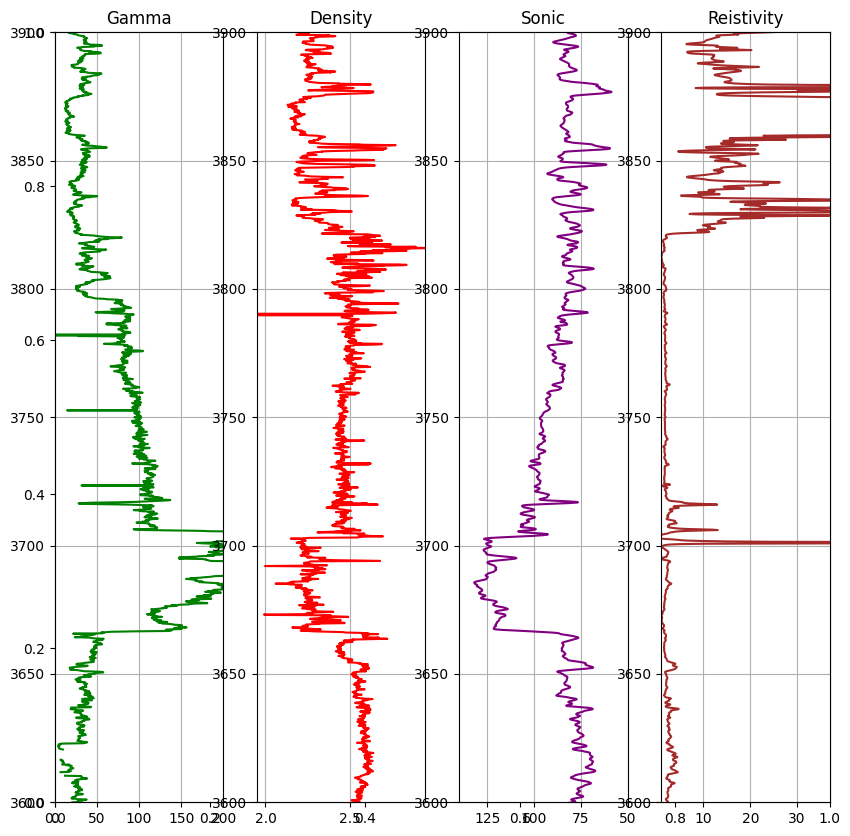

In [21]:
fig = plt.subplots(figsize=(10,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1)

ax1.plot("GR", "DEPTH", data = df, color = "green") # Call the data from the well dataframe
ax1.set_title("Gamma") # Assign a track title
ax1.set_xlim(0, 200) # Change the limits for the curve being plotted
ax1.set_ylim(3600, 3900) # Set the depth range
ax1.grid() # Display the grid

ax2.plot("RHOB", "DEPTH", data = df, color = "red")
ax2.set_title("Density")
ax2.set_xlim(1.95, 2.95)
ax2.set_ylim(3600, 3900)
ax2.grid()

ax3.plot("DT", "DEPTH", data = df, color = "purple")
ax3.set_title("Sonic")
ax3.set_xlim(140, 50)
ax3.set_ylim(3600, 3900)
ax3.grid()

ax4.plot("RT", "DEPTH", data = df, color = "brown")
ax4.set_title("Reistivity")
ax4.set_xlim(1, 37)
ax4.set_ylim(3600, 3900)
ax4.grid()

##Customising the Log Plot
###We can further customise the plot to look more like a familiar log plot, with the curve names and scales at the top and two curves (density & neutron) in the one track.

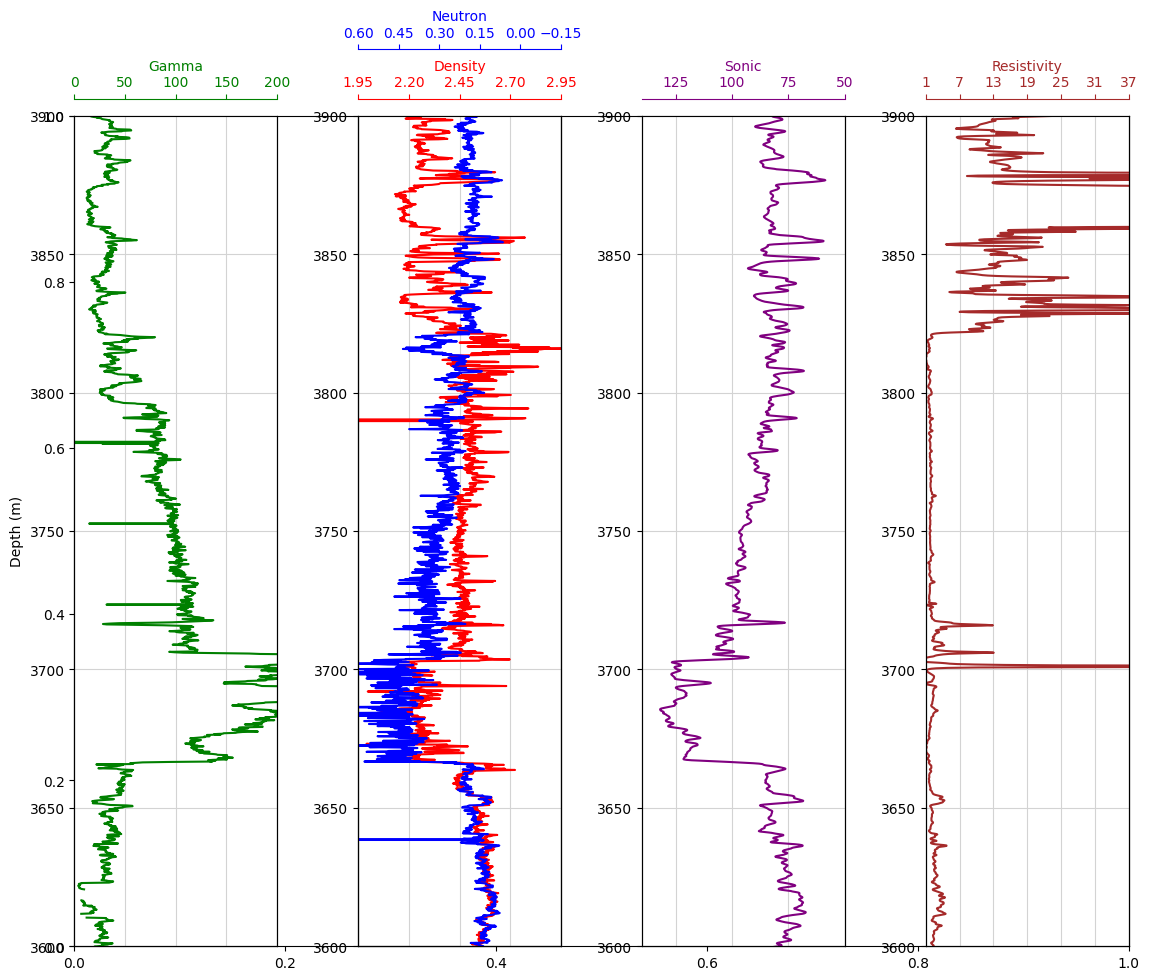

In [23]:
fig, ax = plt.subplots(figsize=(12,10))  # Increased figure width to accommodate new track

#Set up the plot axes
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan=1)  # Changed to (1,4) grid
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan=1)
ax4 = ax2.twiny() #Twins the y-axis for the density track with the neutron track
ax5 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan=1)  # New track for resistivity

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax7 = ax1.twiny()
ax7.xaxis.set_visible(False)
ax8 = ax2.twiny()
ax8.xaxis.set_visible(False)
ax9 = ax3.twiny()
ax9.xaxis.set_visible(False)
ax10 = ax5.twiny()  # New twin axis for resistivity track
ax10.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = df, color = "green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Density track
ax2.plot("RHOB", "DEPTH", data = df, color = "red")
ax2.set_xlabel("Density")
ax2.set_xlim(1.95, 2.95)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([1.95, 2.2, 2.45, 2.7, 2.95])

# Sonic track
ax3.plot("DT", "DEPTH", data = df, color = "purple")
ax3.set_xlabel("Sonic")
ax3.set_xlim(140, 50)
ax3.xaxis.label.set_color("purple")
ax3.tick_params(axis='x', colors="purple")
ax3.spines["top"].set_edgecolor("purple")

# Resistivity track
ax5.plot("RT", "DEPTH", data = df, color = "brown")
ax5.set_xlabel("Resistivity")
ax5.set_xlim(1, 37)
ax5.xaxis.label.set_color("brown")
ax5.tick_params(axis='x', colors="brown")
ax5.spines["top"].set_edgecolor("brown")
ax5.set_xticks([1, 7, 13, 19, 25, 31, 37])

# Neutron track placed ontop of density track
ax4.plot("NPHI", "DEPTH", data = df, color = "blue")
ax4.set_xlabel('Neutron')
ax4.xaxis.label.set_color("blue")
ax4.set_xlim(0.60, -0.15)
ax4.set_ylim(3600, 3900)
ax4.tick_params(axis='x', colors="blue")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.spines["top"].set_edgecolor("blue")
ax4.set_xticks([0.6, 0.45, 0.3, 0.15,0, -0.15])

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax5]:  # Added ax5 to the loop
    ax.set_ylim(3600, 3900)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))

plt.tight_layout()